# Kmeans with Local Expension
___

In [1]:
from utils.utils import *
from utils.visualization import *
from utils.communities_network import *
from utils.iterative_greedy_algorithm import IG
from utils.kmeans import * 
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Test

### 1.1 Dolphins

In [3]:

file_path = 'data/reel/dolphins/dolphins.gml'
G = nx.read_gml(file_path, label='id')
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
true_labels = read_community_labels_file_reel(
    'data/reel/dolphins/groundTruth.txt')
print(f"The graph contains {adj_matrix.shape[0]} nodes.")

The graph contains 62 nodes.


In [4]:

start_time = time.time()
Cmax, Qmax, Kbest , Labels , trace = local_expansion_kmeans(G, adj_matrix, 2, 10 )
end_time = time.time()


for item in trace:

    item["NMI"] = calc_nmi(true_labels, communities_to_labels(
        G, item["communities"], original_nodes))
    
new_methode_time = end_time - start_time
new_methode_modularity = Qmax
new_methode_nmi = trace[Kbest-2]["NMI"]
new_methode_nb_communities = len(Cmax)


custom_df_styling(trace)

K,Modularity,NMI
2,0.032574,0.015262
3,-0.046893,0.023255
4,0.103694,0.063968
5,0.245540,0.243469
6,0.257585,0.268109
7,0.184921,0.259017
8,0.156145,0.249858
9,0.181698,0.284888
10,0.186128,0.293518


The animation GIF is saved in dolphins.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


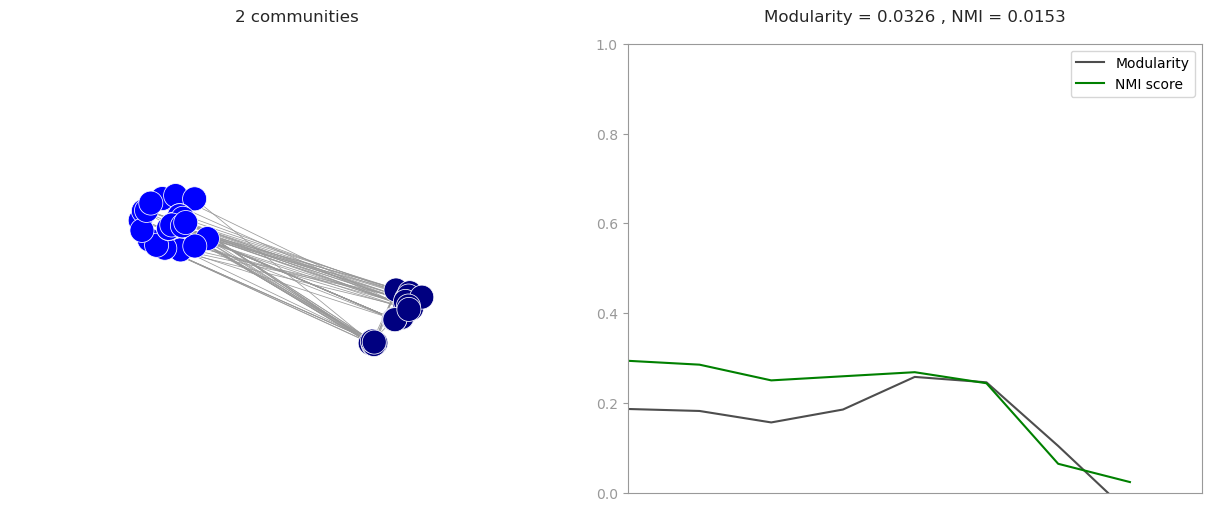

In [5]:

x = clusters_animation(adj_matrix, trace[::-1],dark=False,duration=20,filename="dolphins.gif" ,  dpi = 200)

#### Iterated Greedy

In [6]:

start_time = time.time()
communitites, modularity_trace, _, _ = IG(adj_matrix, 15, 0.5)
end_time = time.time()


ig_nmi = calc_nmi(true_labels,communities_to_labels(G,communitites,original_nodes))
ig_mod = modularity_trace[-1]
ig_time = end_time - start_time
ig_nb_communities = len(communitites)

IG:   0%|          | 0/15 [00:00<?, ?it/s]

#### Louvain

In [7]:
start = time.time()
partition , mod = louvain(G) 
end = time.time()

louvain_nmi = calc_nmi(true_labels, partition.items())
louvain_time = end - start
louvain_mod = mod
louvain_nb_communities = len(set(partition.values()))


In [8]:
start_time = time.time()
Cmax, Qmax, Kbest, Labels, trace = kmeans_random(G, adj_matrix, 2, 20)


end_time = time.time()


for item in trace:
    item["NMI"] = calc_nmi(true_labels, communities_to_labels(
        G, item["communities"], original_nodes))

print(Cmax)
kmeans_time = end_time - start_time
kmeans_modularity = Qmax
kmeans_nmi = trace[Kbest-2]["NMI"]
kmeans_nb_communities = len(Cmax)

[[0, 1, 2, 5, 6, 7, 9, 10, 13, 17, 19, 27, 28, 30, 41, 42, 47, 54, 57], [3, 4, 11, 12, 22, 23, 25, 26, 31, 32, 35, 39, 44, 46, 48, 49, 52, 53, 55, 56, 58, 60, 61], [8, 14, 15, 16, 18, 20, 21, 24, 29, 33, 34, 36, 37, 38, 40, 43, 45, 50, 51, 59]]


In [9]:
kmeans_nmi

0.21744063554979037

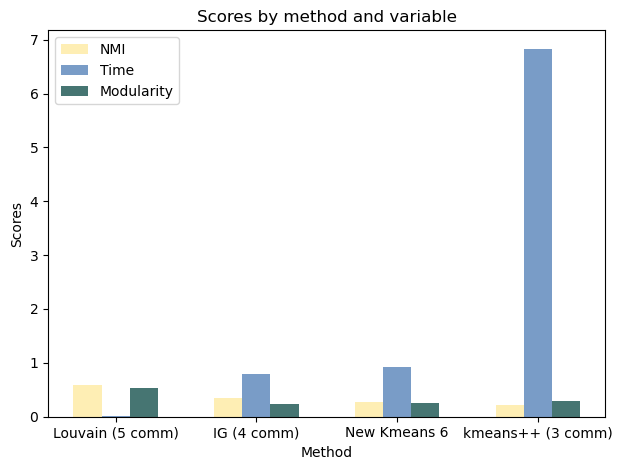

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
n_groups = 4
# NMI for Louvain, IG, New Method
nmi = (louvain_nmi, ig_nmi, new_methode_nmi, kmeans_nmi)
time = (louvain_time, ig_time, new_methode_time , kmeans_time)  # Time for Louvain, IG, New Method
modularity = (louvain_mod, ig_mod, new_methode_modularity , kmeans_modularity)  # Modularity for Louvain, IG, New Method

# Create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, nmi, bar_width,
                 alpha=opacity,
                 color='#FEEAA1',
                 label='NMI')

rects2 = plt.bar(index + bar_width, time, bar_width,
                 alpha=opacity,
                 color='#5784BA',
                 label='Time')

rects3 = plt.bar(index + 2 * bar_width, modularity, bar_width,
                 alpha=opacity,
                 color='#18534F',
                 label='Modularity')



plt.xlabel('Method')
plt.ylabel('Scores')
plt.title('Scores by method and variable')
plt.xticks(index + bar_width, (f'Louvain ({louvain_nb_communities} comm)', f'IG ({ig_nb_communities} comm)',
           f'New Kmeans ({new_methode_nb_communities} comm)', f'kmeans++ ({kmeans_nb_communities} comm)'))
plt.legend()

plt.tight_layout()
plt.show()

In [11]:

file_path = 'data/synth/LFR/0.15/network.dat'
G = nx.read_edgelist(file_path, nodetype=int)
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]

128

In [12]:
true_communities = read_community_labels_file_synth("data/synth/LFR/0.15/community.dat" )

In [13]:
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(G, adj_matrix, 2, 7 )
print(Cmax, Qmax, Kbest)

[[0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 38, 67, 81, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 117], [2, 10, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 44, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 105, 106, 107, 108, 110, 112], [20, 21, 31, 37, 55, 66, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 102, 103, 104, 109, 111, 114, 115, 116, 122, 123, 124, 127], [33, 34, 35, 36, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 61, 62, 63, 64, 65, 68, 69, 70, 71, 99, 100, 113, 118, 119, 120, 121, 125, 126]] 0.6015625 4


In [14]:
Kbest

4

In [15]:
for i, k in enumerate(trace):
    print("K = ", k[1])
    predected_labels = communities_to_labels(G, k[0] , original_nodes)
    print("NMI : " , calc_nmi(true_communities, predected_labels ))

KeyError: 1